# English Words Corpus Analysis
This notebook explores the NLTK words corpus and provides various linguistic analyses.

In [1]:
# Import required libraries
import nltk
from nltk.corpus import words
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string

# Download required NLTK data
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package words to /Users/alex/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alex/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [9]:
# Load the words
word_list = words.words()
print(f"Total number of words: {len(word_list)}")
print(f"Sample of first 10 words: {word_list[:10]}")

Total number of words: 236736
Sample of first 10 words: ['A', 'a', 'aa', 'aal', 'aalii', 'aam', 'Aani', 'aardvark', 'aardwolf', 'Aaron']


## Letter Analysis

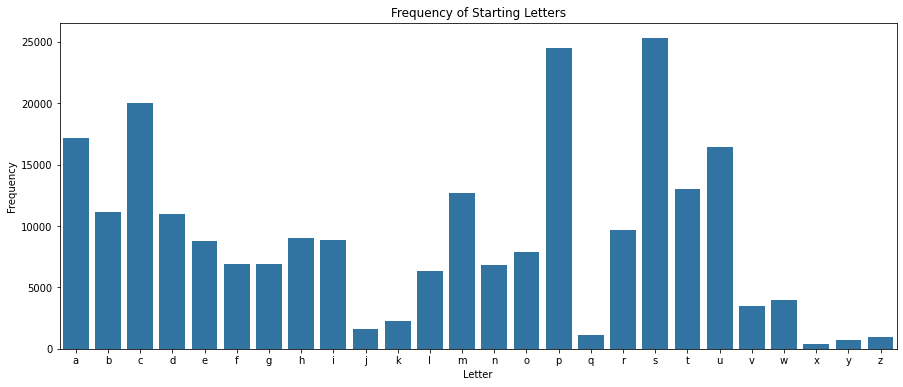

In [4]:
# Analyze starting letters
starting_letters = [word[0].lower() for word in word_list]
letter_freq = Counter(starting_letters)

# Plot starting letter distribution
plt.figure(figsize=(15, 6))
letters = sorted(letter_freq.keys())
frequencies = [letter_freq[letter] for letter in letters]

sns.barplot(x=letters, y=frequencies)
plt.title('Frequency of Starting Letters')
plt.xlabel('Letter')
plt.ylabel('Frequency')
plt.show()

## Pattern Analysis

In [8]:
# Find words with interesting patterns
def analyze_patterns():
    palindromes = [word for word in word_list if word.lower() == word.lower()[::-1] and len(word) > 1]
    repeated_letters = [word for word in word_list if any(word.count(c) >= 3 for c in word.lower())]
    all_vowels = [word for word in word_list if all(c in 'aeiou' for c in word.lower())]
    
    print(f"Number of palindromes: {len(palindromes)}")
    print(f"Sample palindromes: {palindromes[:100]}\n")
    
    print(f"Words with triple letters: {len(repeated_letters)}")
    print(f"Sample triple letter words: {repeated_letters[:5]}\n")
    
    print(f"Words with only vowels: {len(all_vowels)}")
    print(f"Sample vowel-only words: {all_vowels[:5]}")

analyze_patterns()

Number of palindromes: 147
Sample palindromes: ['aa', 'aba', 'Abba', 'acca', 'Ada', 'Adda', 'adda', 'Adinida', 'affa', 'aga', 'aha', 'Ajaja', 'ajaja', 'Aka', 'aka', 'Akka', 'ala', 'Alala', 'alala', 'alula', 'ama', 'Amma', 'amma', 'Ana', 'ana', 'anana', 'Anna', 'anna', 'apa', 'ara', 'Arara', 'arara', 'Asa', 'Ata', 'Atta', 'atta', 'ava', 'awa', 'Bab', 'bib', 'Bob', 'bob', 'boob', 'bub', 'civic', 'dad', 'deed', 'deedeed', 'degged', 'did', 'dod', 'dud', 'eke', 'elle', 'eme', 'ere', 'Eve', 'eve', 'Ewe', 'ewe', 'eye', 'gag', 'gig', 'gog', 'hah', 'hallah', 'huh', 'ihi', 'imi', 'immi', 'kakkak', 'Kassak', 'kayak', 'Kazak', 'keek', 'kelek', 'lemel', 'level', 'maam', 'madam', 'Malayalam', 'Mam', 'mem', 'mesem', 'mim', 'minim', 'mum', 'murdrum', 'Nan', 'nan', 'non', 'noon', 'nun', 'Ofo', 'oho', 'Oto', 'Otto', 'otto', 'pap', 'peep']

Words with triple letters: 52851
Sample triple letter words: ['aardvark', 'abaca', 'abacate', 'abacay', 'abacinate']

Words with only vowels: 25
Sample vowel-only wor

## Word Structure Analysis

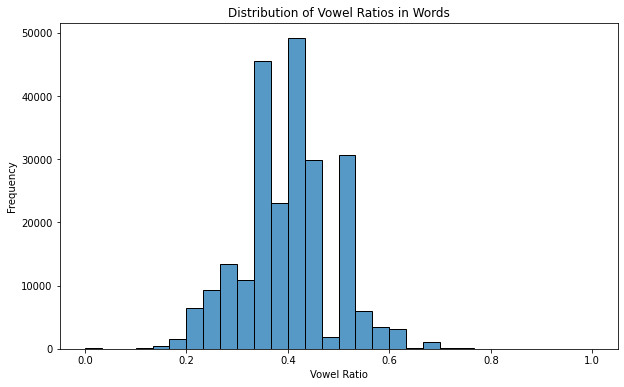

Average vowel ratio: 0.395


In [6]:
# Analyze vowel/consonant patterns
def get_vowel_ratio(word):
    vowels = sum(1 for c in word.lower() if c in 'aeiou')
    return vowels / len(word) if len(word) > 0 else 0

vowel_ratios = [get_vowel_ratio(word) for word in word_list]

plt.figure(figsize=(10, 6))
sns.histplot(vowel_ratios, bins=30)
plt.title('Distribution of Vowel Ratios in Words')
plt.xlabel('Vowel Ratio')
plt.ylabel('Frequency')
plt.show()

print(f"Average vowel ratio: {sum(vowel_ratios)/len(vowel_ratios):.3f}")

## Most Common Patterns

In [7]:
# Analyze common prefixes and suffixes
def analyze_affixes():
    prefixes = Counter(word[:3].lower() for word in word_list if len(word) >= 3)
    suffixes = Counter(word[-3:].lower() for word in word_list if len(word) >= 3)
    
    print("Most common prefixes (3 letters):")
    for prefix, count in prefixes.most_common(10):
        print(f"{prefix}: {count}")
    
    print("\nMost common suffixes (3 letters):")
    for suffix, count in suffixes.most_common(10):
        print(f"{suffix}: {count}")

analyze_affixes()

Most common prefixes (3 letters):
pre: 3032
non: 2793
pro: 2451
ove: 2058
con: 1979
und: 1901
int: 1805
ant: 1746
dis: 1714
uns: 1674

Most common suffixes (3 letters):
ess: 9274
ion: 6948
ous: 6423
ing: 5559
ate: 4566
ble: 4356
tic: 3998
ism: 3483
ist: 3288
ite: 3065


In [10]:
# Get all 14 letter words and analyze their starting letters
fourteen_letter_words = [word for word in word_list if len(word) == 14]
df = pd.DataFrame(fourteen_letter_words, columns=['word'])
df['first_letter'] = df['word'].str[0].str.lower()

# Get count of words starting with each letter
letter_counts = df['first_letter'].value_counts().sort_index()

print(f"Total number of 14-letter words: {len(fourteen_letter_words)}")
print("\nDistribution of starting letters:")
print(letter_counts)

# Display some example words
print("\nExample 14-letter words:")
print(df['word'].head())

Total number of 14-letter words: 9766

Distribution of starting letters:
a     745
b     192
c     776
d     442
e     359
f     145
g     153
h     413
i     593
j      12
k      15
l     144
m     510
n     466
o     356
p    1435
q      74
r     354
s    1033
t     444
u     944
v      94
w      27
x      16
y       2
z      22
Name: first_letter, dtype: int64

Example 14-letter words:
0    abarticulation
1    abdominocystic
2    abominableness
3    absentmindedly
4    absolutization
Name: word, dtype: object


In [14]:
# Get all 14 letter words and analyze their starting letters
fourteen_letter_words = [word for word in word_list if len(word) == 14]
df = pd.DataFrame(fourteen_letter_words, columns=['word'])
df['first_letter'] = df['word'].str[0].str.lower()

# Get count of words starting with each letter
letter_counts = df['first_letter'].value_counts().sort_index()

print(f"Total number of 14-letter words: {len(fourteen_letter_words)}")
print("\nDistribution of starting letters:")
print(letter_counts)

# Display some example words
print("\nExample 14-letter words:")
print(df['word'].head())

Total number of 14-letter words: 9766

Distribution of starting letters:
a     745
b     192
c     776
d     442
e     359
f     145
g     153
h     413
i     593
j      12
k      15
l     144
m     510
n     466
o     356
p    1435
q      74
r     354
s    1033
t     444
u     944
v      94
w      27
x      16
y       2
z      22
Name: first_letter, dtype: int64

Example 14-letter words:
0    abarticulation
1    abdominocystic
2    abominableness
3    absentmindedly
4    absolutization
Name: word, dtype: object


In [20]:
# Import additional corpora
from nltk.corpus import reuters, gutenberg, brown
# nltk.download('reuters')
# nltk.download('gutenberg')
# nltk.download('brown')

def analyze_corpus_word_frequencies(corpus_name, corpus_words):
    # Create frequency distribution for the corpus
    word_freq_dist = nltk.FreqDist([word.lower() for word in corpus_words])
    total_words = len(corpus_words)
    unique_words = len(set(word.lower() for word in corpus_words))
    
    # Create DataFrame with 14 letter words and their probabilities
    fourteen_letter_words = [word for word in word_list if len(word) == 14]
    # Convert to lowercase and remove duplicates before creating DataFrame
    fourteen_letter_words = list(set(word.lower() for word in fourteen_letter_words))
    df = pd.DataFrame(fourteen_letter_words, columns=['word'])
    
    # Calculate frequency and probability for each word
    df['frequency'] = df['word'].apply(lambda x: word_freq_dist[x])  # x is already lowercase
    df['probability'] = df['frequency'] / total_words
    df['frequency_per_million'] = df['probability'] * 1_000_000
    
    # Sort by probability in descending order
    df_sorted = df.sort_values('probability', ascending=False)
    
    # Display results
    print(f"\nResults for {corpus_name} corpus:")
    print("Top 20 most common 14-letter words:")
    print(df_sorted[['word', 'frequency', 'frequency_per_million']]
          .head(20)
          .to_string(float_format=lambda x: '{:.4f}'.format(x)))
    
    print(f"\nSummary statistics for 14-letter word frequencies per million in {corpus_name}:")
    print(df['frequency_per_million'].describe())
    
    return {
        'corpus_name': corpus_name,
        'total_words': total_words,
        'unique_words': unique_words,
        'vocab_richness': unique_words / total_words,
        'num_14_letter_words': len(df[df['frequency'] > 0]),
        'avg_14_letter_freq': df['frequency'].mean(),
        'max_14_letter_freq': df['frequency'].max(),
        'total_14_letter_occurrences': df['frequency'].sum(),
        'pct_14_letter_words': (df['frequency'].sum() / total_words) * 100
    }

# Analyze each corpus separately and collect statistics
corpus_stats = []
for corpus_name, corpus in [('Reuters', reuters.words()), 
                          ('Gutenberg', gutenberg.words()),
                          ('Brown', brown.words())]:
    stats = analyze_corpus_word_frequencies(corpus_name, corpus)
    corpus_stats.append(stats)

# Create and display comparison DataFrame
comparison_df = pd.DataFrame(corpus_stats)
comparison_df.set_index('corpus_name', inplace=True)
print("\nCorpus Comparison Statistics:")
print(comparison_df.round(4).to_string())


Results for Reuters corpus:
Top 20 most common 14-letter words:
                word  frequency  frequency_per_million
5848  administration        358               208.0306
6529  representative        122                70.8931
9679  transportation        101                58.6902
6370  reorganization         59                34.2844
8248  recommendation         58                33.7033
2807  undersecretary         36                20.9193
9320  implementation         32                18.5949
8148  administrative         27                15.6895
5276  pharmaceutical         26                15.1084
3317  responsibility         19                11.0407
5678  disappointment         15                 8.7164
6136  representation         15                 8.7164
7483  rehabilitation         14                 8.1353
8185  extinguishment         12                 6.9731
9325  unsuccessfully         11                 6.3920
1883  reintroduction         10                 5.8109


In [23]:
from nltk import FreqDist

# Create separate files for each corpus's 14-letter words
for corpus_name, corpus in [('Reuters', reuters.words()), 
                          ('Gutenberg', gutenberg.words()),
                          ('Brown', brown.words())]:
    # Get word frequencies
    word_freq_dist = FreqDist(word.lower() for word in corpus if word.isalpha())
    total_words = sum(word_freq_dist.values())
    
    # Get 14-letter words and their stats
    fourteen_letter_words = [word for word in word_freq_dist.keys() if len(word) == 14]
    fourteen_letter_words.sort()  # Sort alphabetically
    
    # Write to file
    with open(f'{corpus_name.lower()}_14letter_words.txt', 'w') as f:
        for word in fourteen_letter_words:
            frequency = word_freq_dist[word]
            frequency_per_total = frequency / total_words
            f.write(f"{word} {frequency} / {total_words} = {frequency / total_words} \n")



In [26]:
def find_words_with_common_affixes(filename, min_occurrences=14):
    # Read 14-letter words from file
    words = []
    with open(filename, 'r') as f:
        for line in f:
            word = line.split()[0]  # Get just the word, not the frequency
            if len(word) == 14:  # Verify it's a 14-letter word
                words.append(word)
    
    # Find all possible prefixes and the words that contain them
    prefix_words = {}
    for word in words:
        for length in range(1, 14):  # Try all possible prefix lengths
            prefix = word[:length]
            if prefix not in prefix_words:
                prefix_words[prefix] = []
            prefix_words[prefix].append(word)
                
    # Find all possible suffixes and the words that contain them
    suffix_words = {}
    for word in words:
        for length in range(1, 14):  # Try all possible suffix lengths
            suffix = word[-length:]
            if suffix not in suffix_words:
                suffix_words[suffix] = []
            suffix_words[suffix].append(word)
    
    # Filter for minimum occurrences
    common_prefix_words = {k: v for k, v in prefix_words.items() if len(v) >= min_occurrences}
    common_suffix_words = {k: v for k, v in suffix_words.items() if len(v) >= min_occurrences}
    
    # Sort by affix length (descending), then by count, then alphabetically
    common_prefix_words = dict(sorted(common_prefix_words.items(), 
        key=lambda x: (-len(x[0]), -len(x[1]), x[0])))
    common_suffix_words = dict(sorted(common_suffix_words.items(), 
        key=lambda x: (-len(x[0]), -len(x[1]), x[0])))
    
    return common_prefix_words, common_suffix_words

# Analyze each corpus and write to files
for corpus in ['reuters', 'gutenberg', 'brown']:
    input_filename = f'{corpus}_14letter_words.txt'
    prefix_output = f'{corpus}_common_prefixes.txt'
    suffix_output = f'{corpus}_common_suffixes.txt'
    
    prefix_words, suffix_words = find_words_with_common_affixes(input_filename)
    
    # Write prefixes to file
    with open(prefix_output, 'w') as f:
        f.write(f"{corpus.upper()} Corpus Words with Common Prefixes (14+ occurrences):\n\n")
        for prefix, words in prefix_words.items():
            f.write(f"\n{prefix} ({len(words)} words):\n")
            for word in sorted(words):
                f.write(f"  {word}\n")
    
    # Write suffixes to file
    with open(suffix_output, 'w') as f:
        f.write(f"{corpus.upper()} Corpus Words with Common Suffixes (14+ occurrences):\n\n")
        for suffix, words in suffix_words.items():
            f.write(f"\n{suffix} ({len(words)} words):\n")
            for word in sorted(words):
                f.write(f"  {word}\n")